Loading Necessary Libraries for Detection (Prediction)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

ValueError: Mismatched version between the Python package and the native shared object.  Python package version: 2.0.3. Shared object version: 2.1.4. Shared object is loaded from: C:\Users\USER\anaconda3\lib\site-packages\xgboost\lib\xgboost.dll.
Likely cause:
  * XGBoost is first installed with anaconda then upgraded with pip. To fix it please remove one of the installations.

In [ ]:
#pip install xgboost

In [ ]:
#conda install -c conda-forge xgboost

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
#conda install -c conda-forge imbalanced-learn

___Loading Dataset___

In [21]:
df=pd.read_csv("DrDoS_UDP.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_10596\1986461260.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("DrDoS_UDP.csv")


In [ ]:
df

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136802 entries, 0 to 3136801
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [18]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

___Data Cleaning___

In [24]:
#Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64


In [25]:
#Iterate over columns with missing values
columns_with_missing_values = []
for column, count in missing_values.items():
    if count > 0:
        columns_with_missing_values.append(column)

#Print columns with missing values
print("Columns with Missing Values:")
for column in columns_with_missing_values:
    print(f"{column}: {missing_values[column]} missing values")

Columns with Missing Values:
Flow Bytes/s: 8 missing values


In [27]:
#Because we have less number of Missing Values, We will be dropping the rows with missing values
df = df.dropna()

___Exploiratory Data Analysis___ __EDA__

In [22]:
#Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Unnamed: 0   Source Port   Destination Port      Protocol  \
count  3.136802e+06  3.136802e+06       3.136802e+06  3.136802e+06   
mean   6.284729e+04  4.678466e+04       3.326777e+04  1.699073e+01   
std    3.640744e+04  8.463285e+03       1.865171e+04  3.255629e-01   
min    0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00   
25%    3.136800e+04  3.980600e+04       1.715900e+04  1.700000e+01   
50%    6.273600e+04  4.689400e+04       3.329400e+04  1.700000e+01   
75%    9.410400e+04  5.389600e+04       4.942600e+04  1.700000e+01   
max    1.325940e+05  6.553100e+04       6.553500e+04  1.700000e+01   

        Flow Duration   Total Fwd Packets   Total Backward Packets  \
count    3.136802e+06        3.136802e+06             3.136802e+06   
mean     9.454659e+04        3.769507e+00             5.931838e-03   
std      6.825386e+05        3.745687e+00             6.018696e-01   
min      0.000000e+00        1.000000e+00             0.000000e+00  

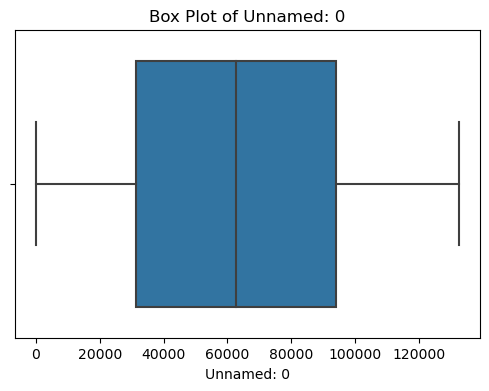

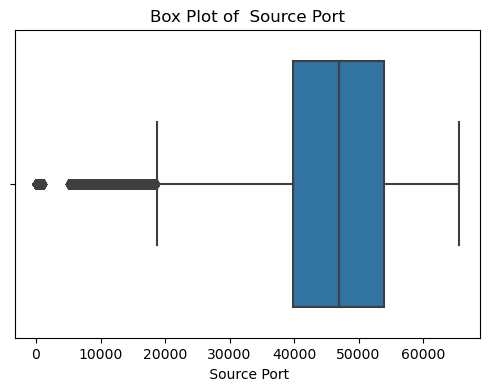

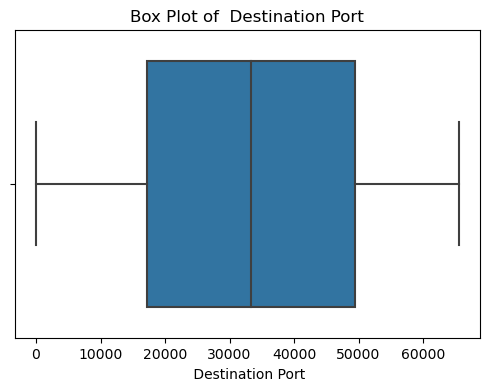

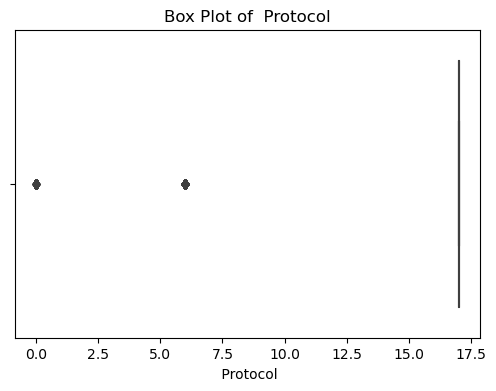

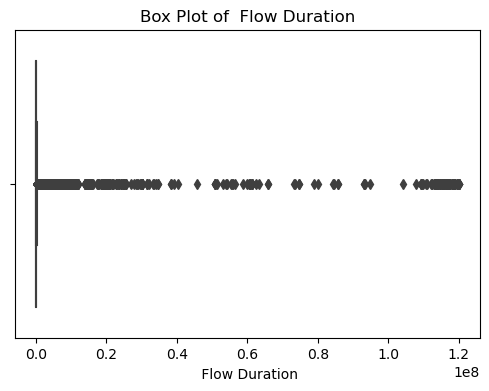

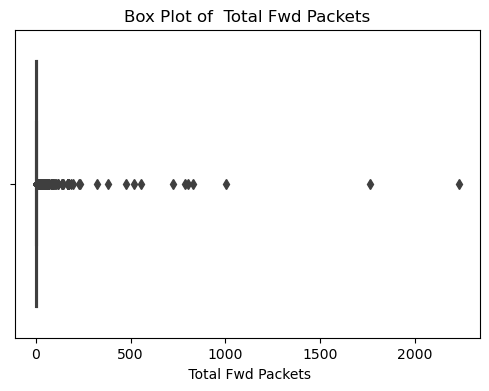

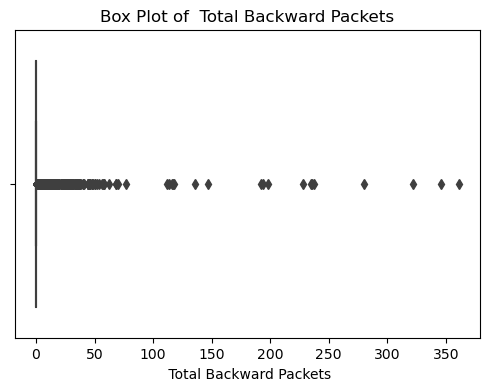

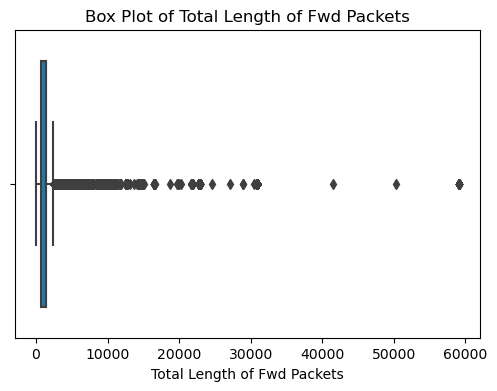

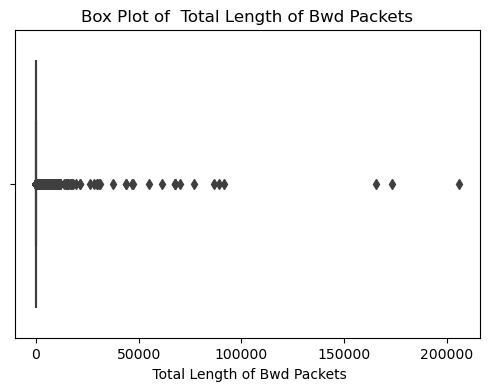

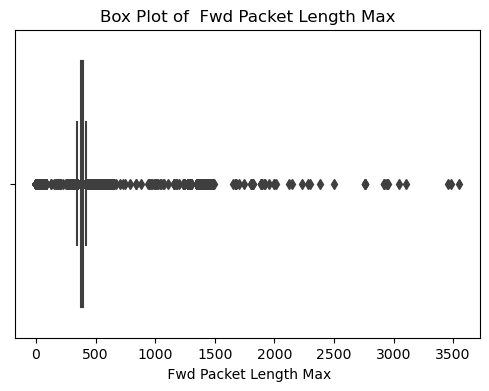

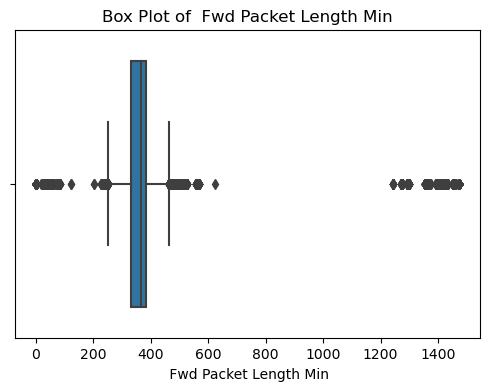

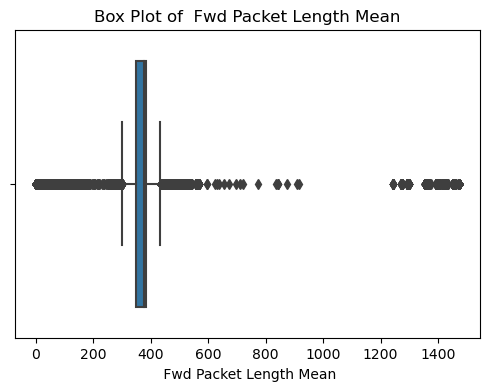

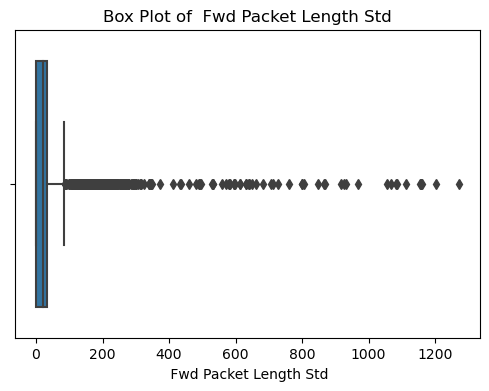

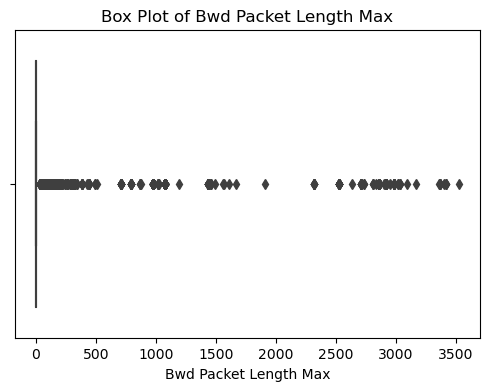

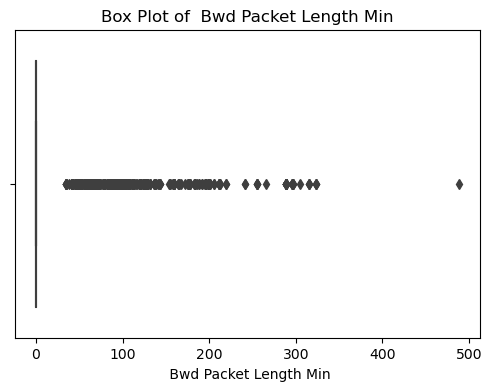

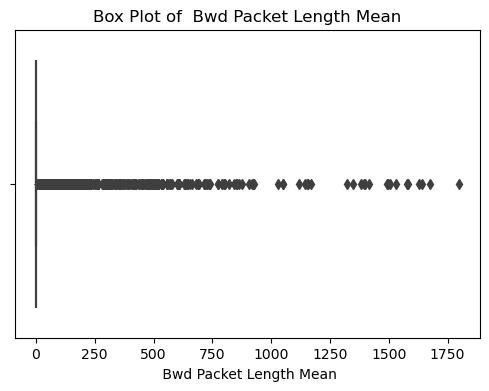

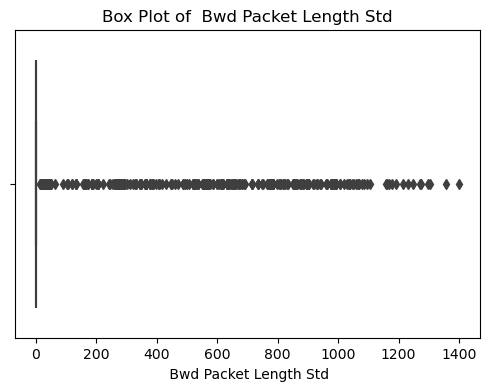

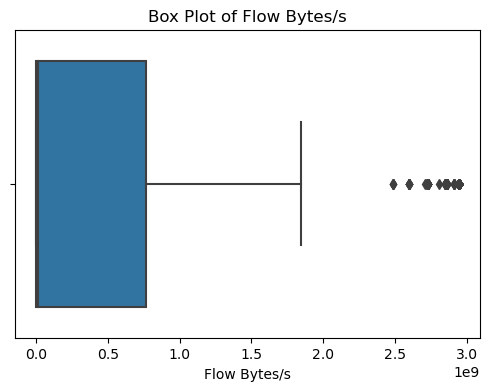

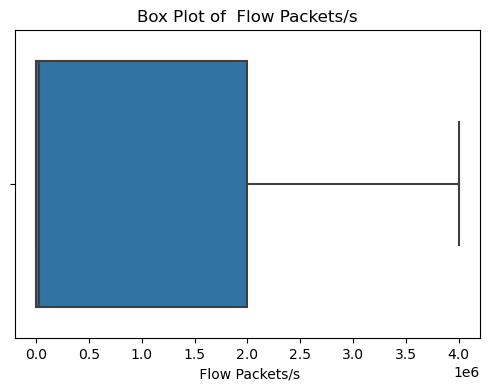

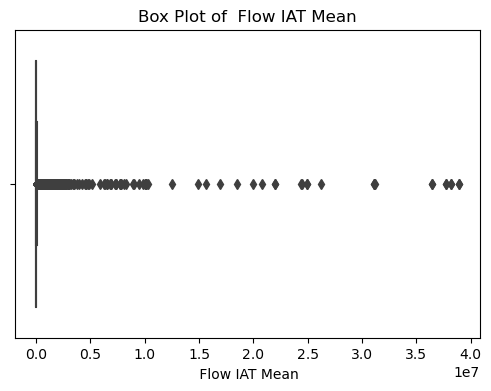

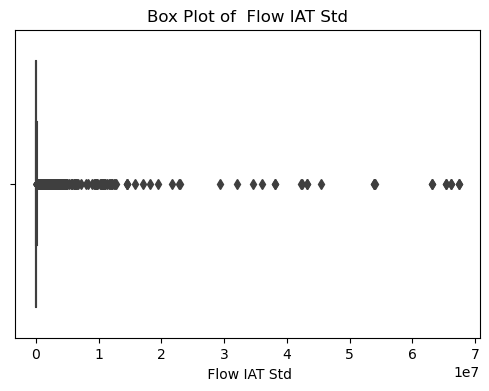

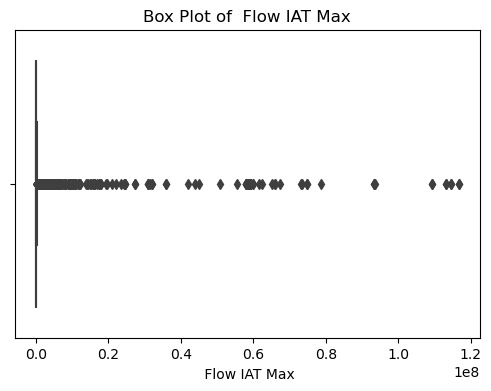

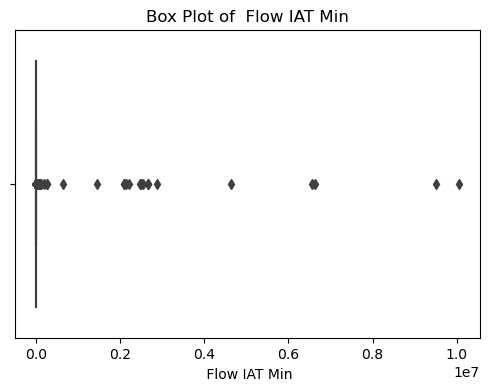

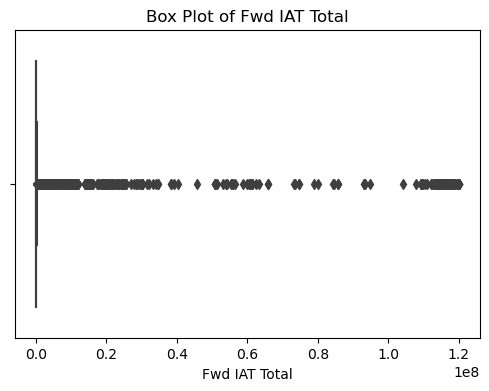

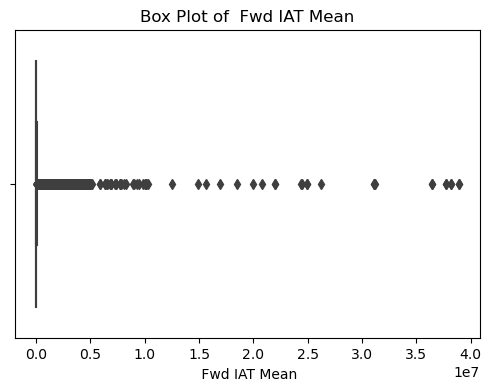

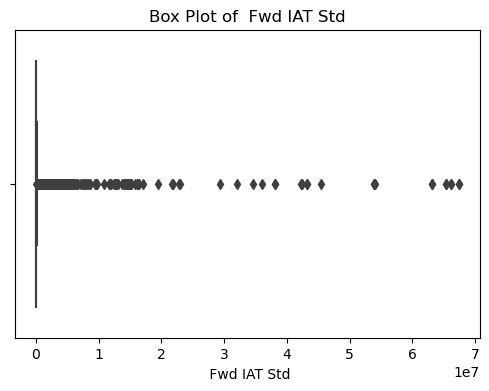

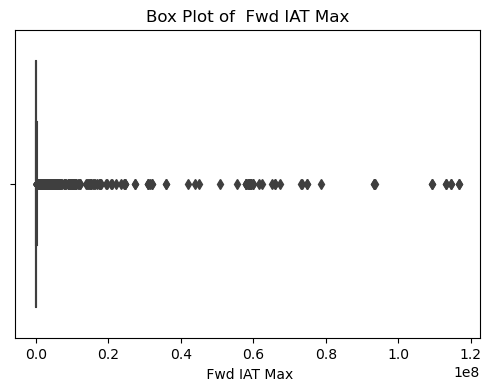

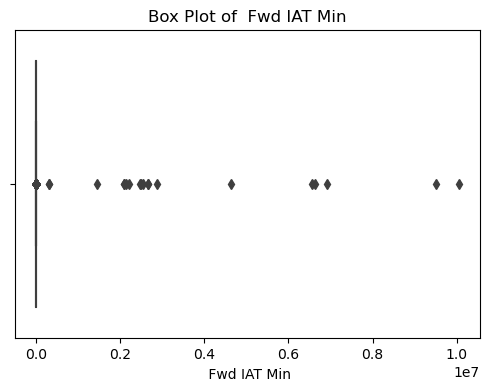

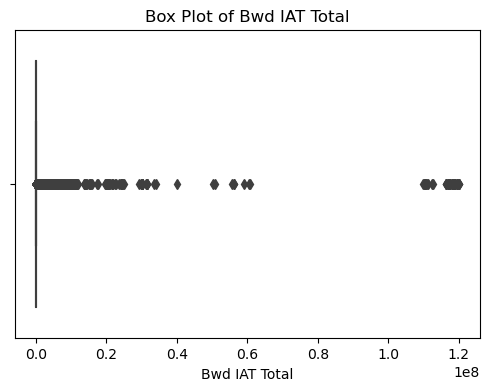

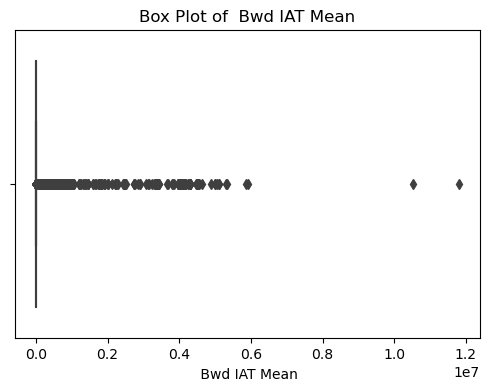

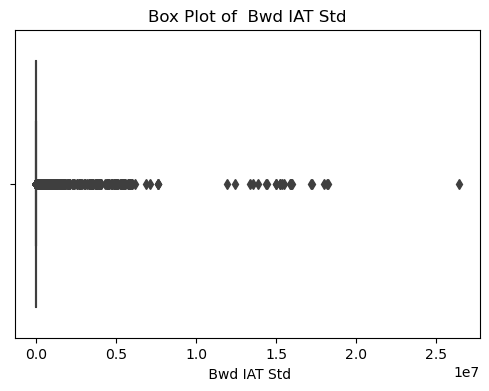

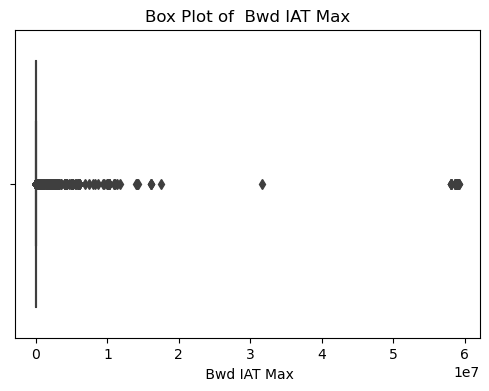

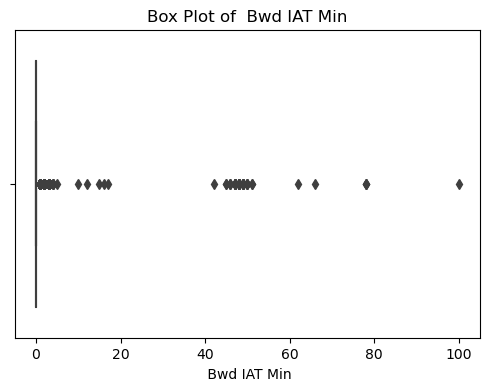

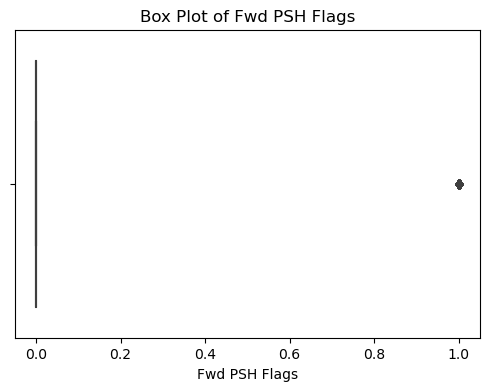

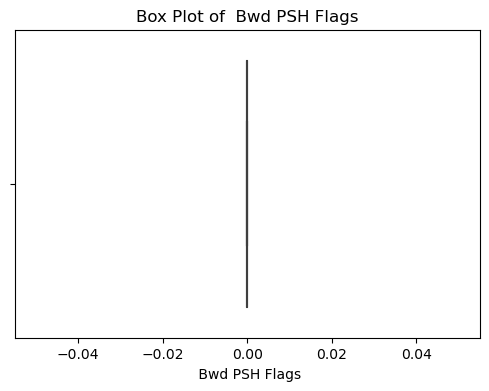

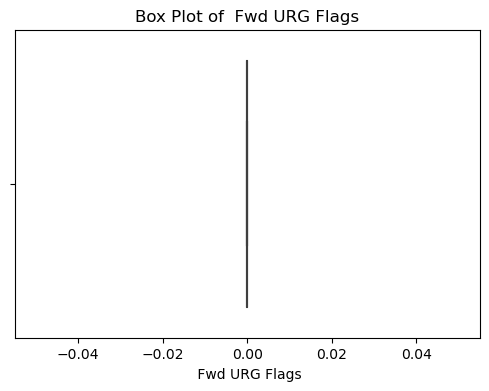

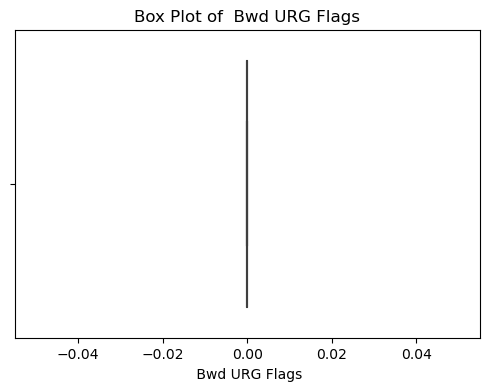

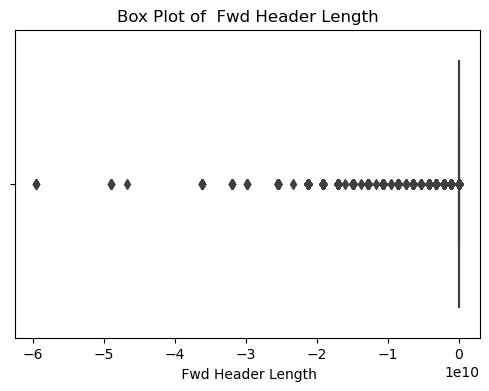

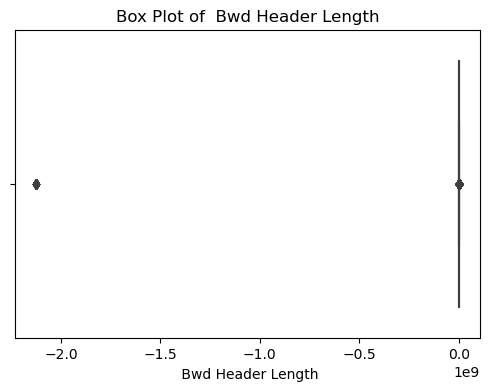

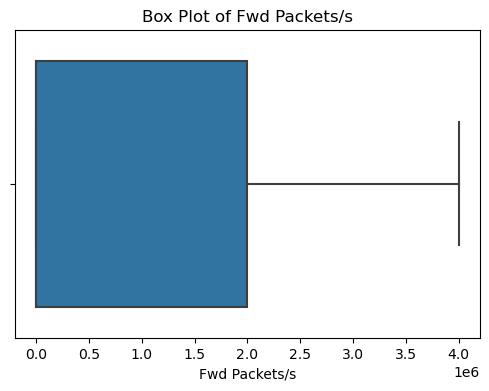

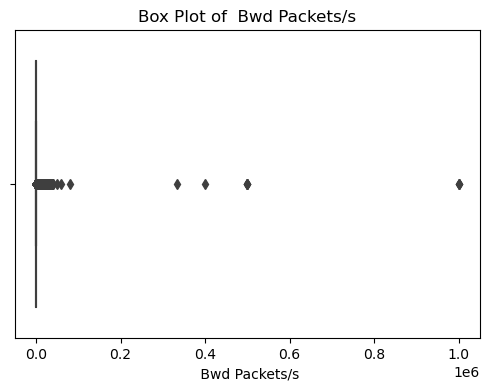

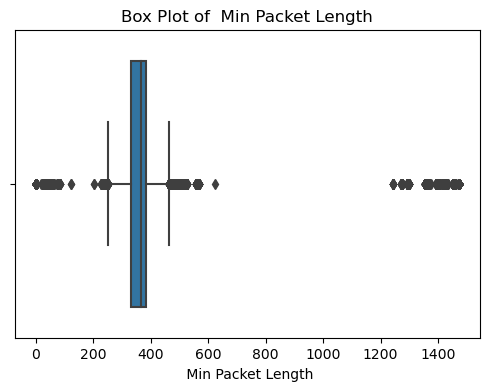

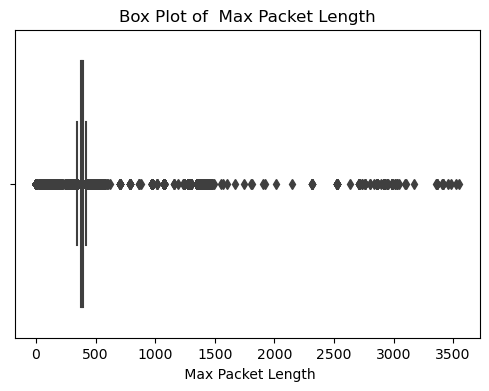

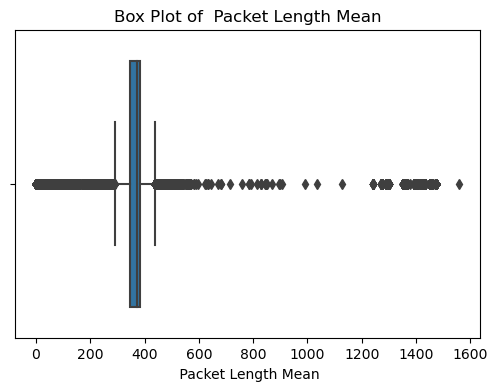

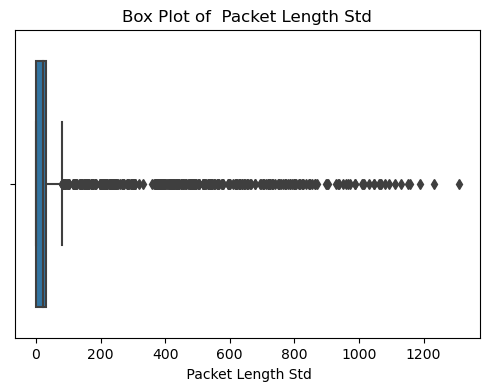

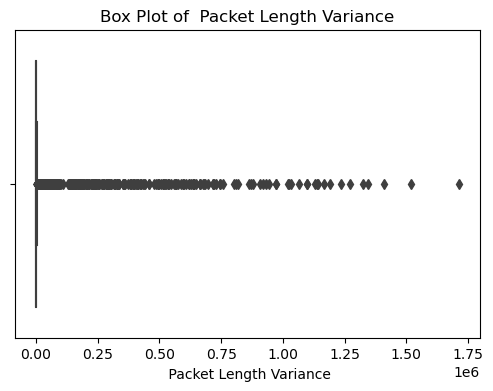

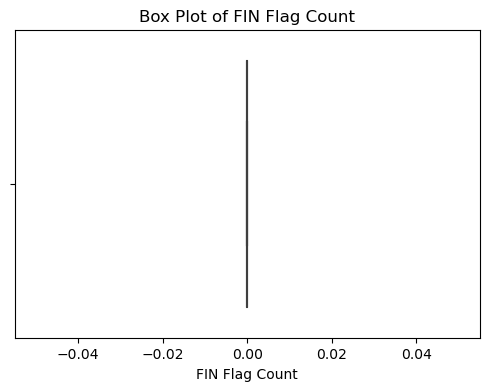

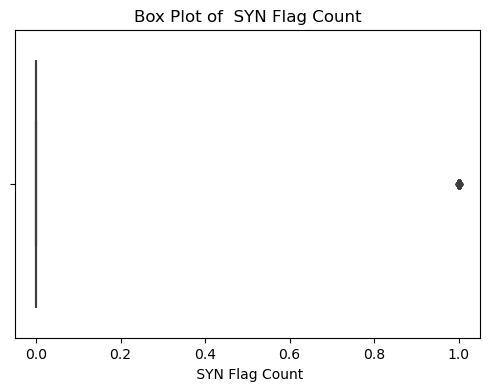

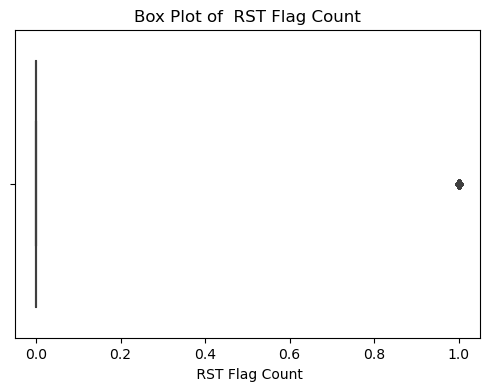

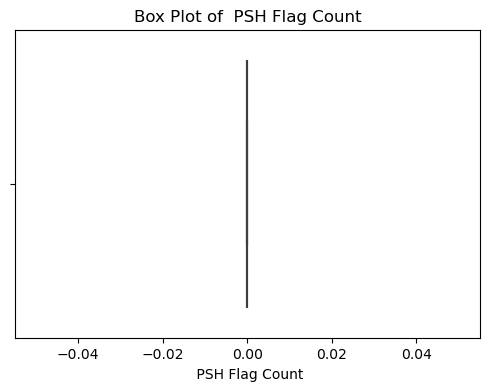

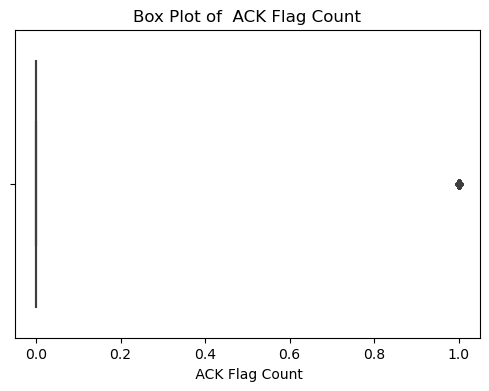

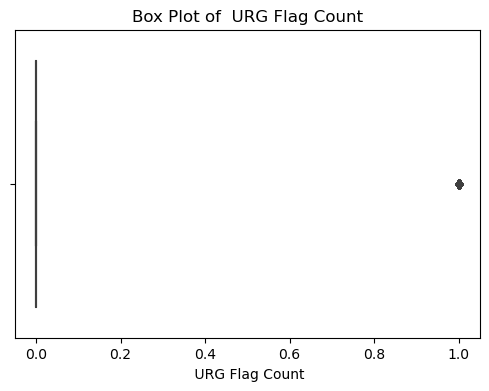

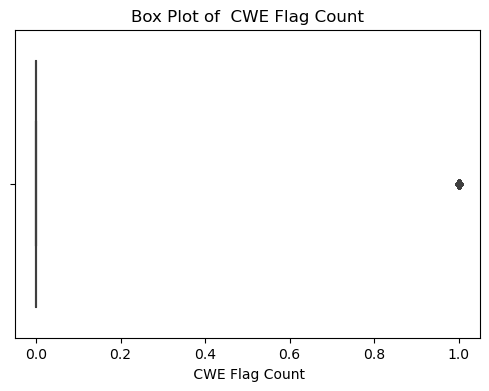

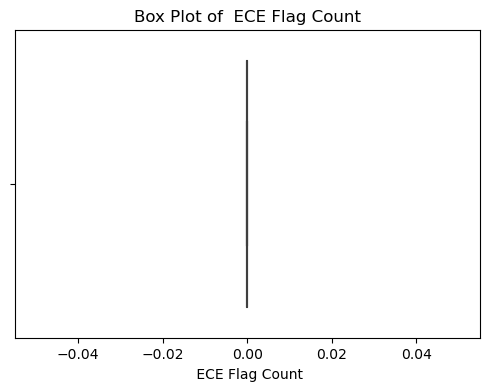

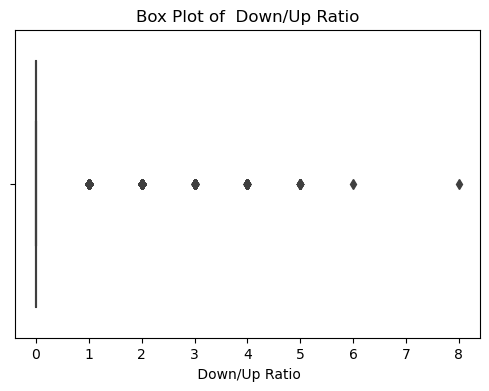

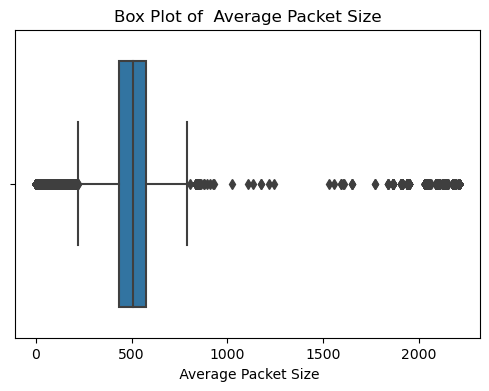

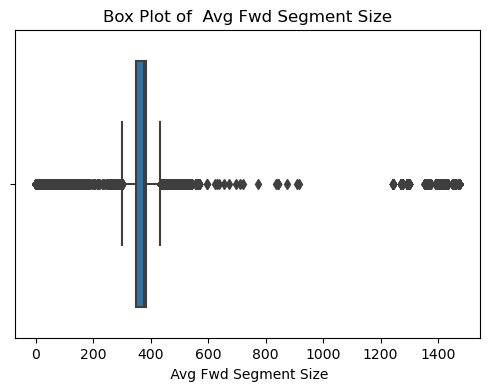

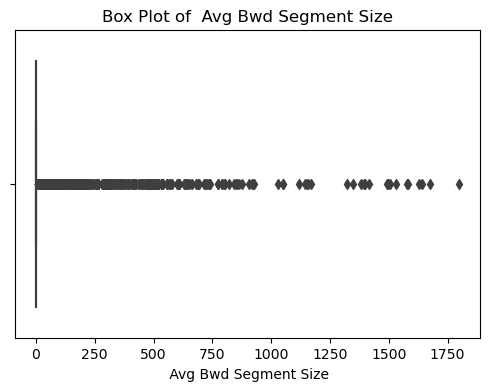

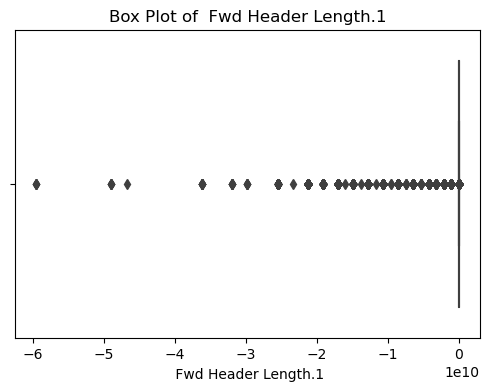

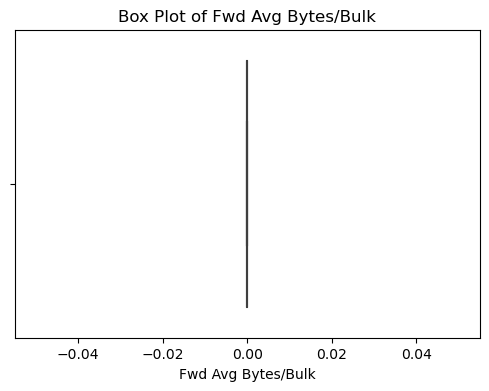

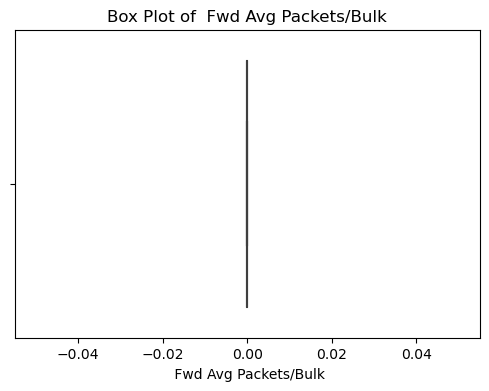

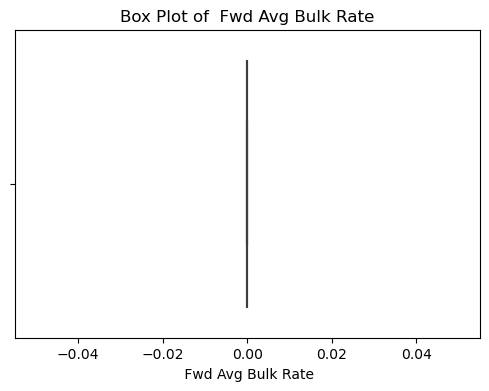

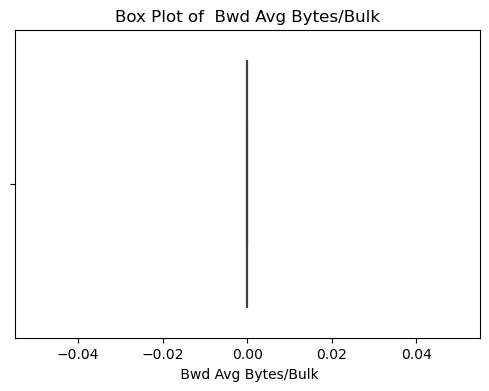

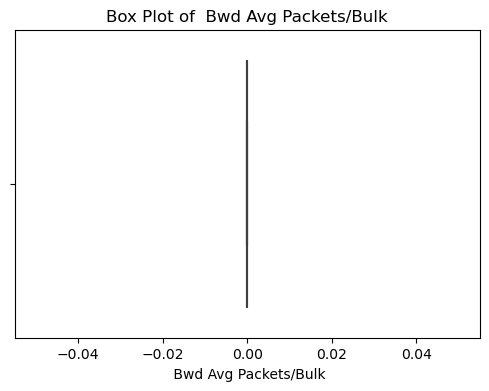

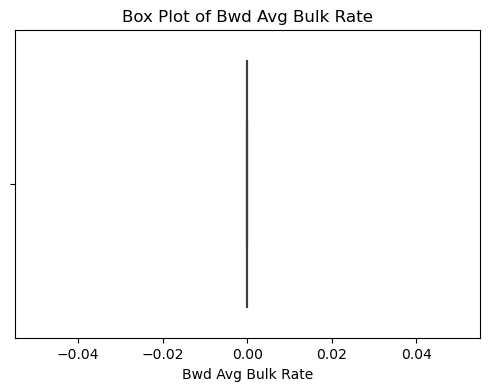

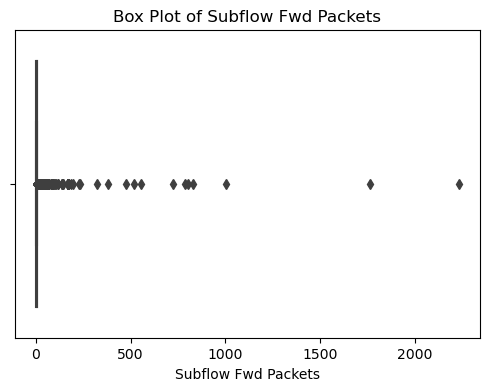

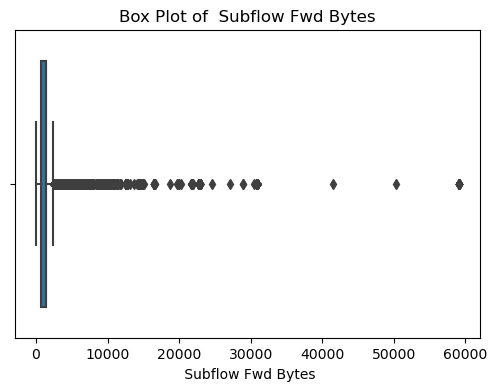

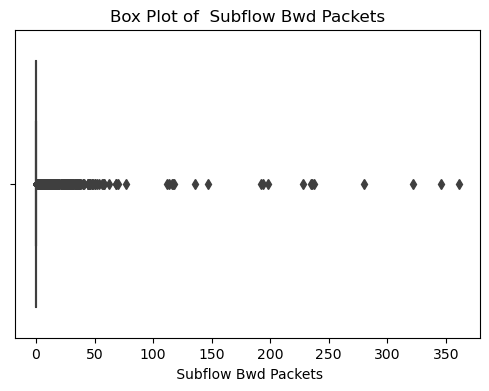

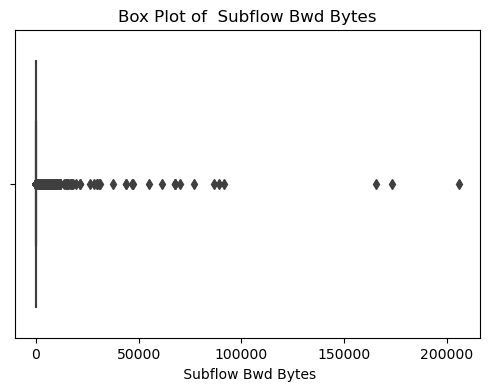

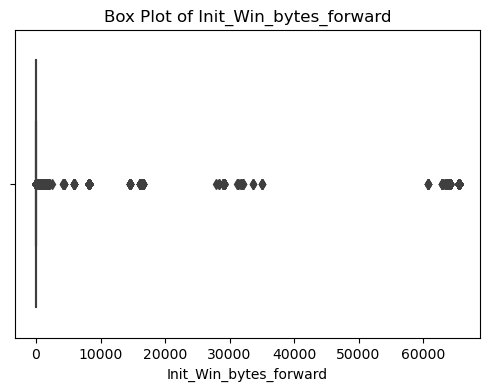

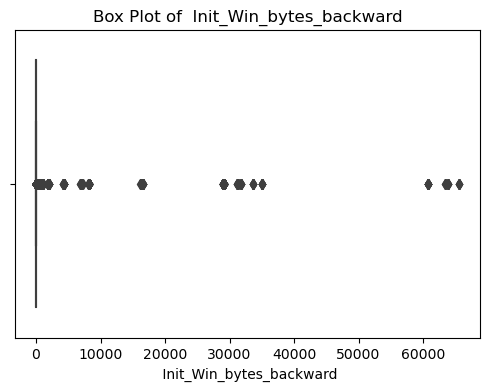

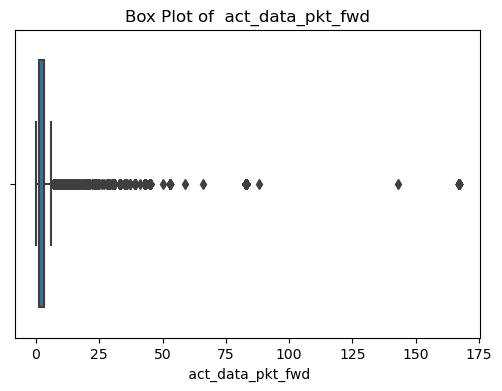

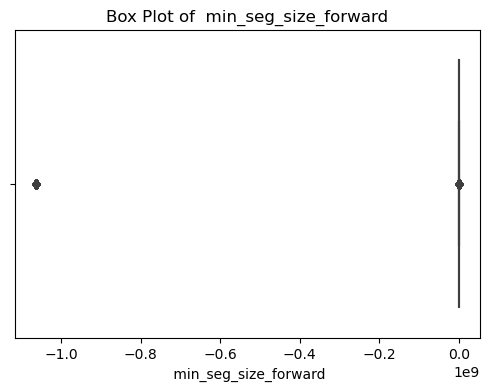

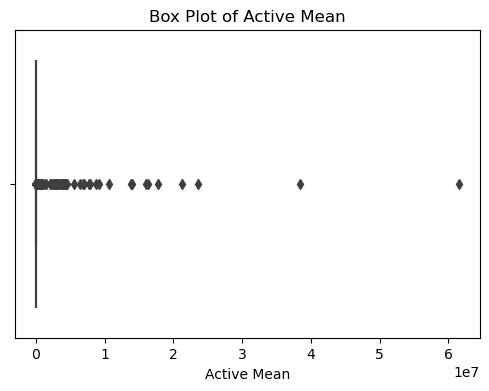

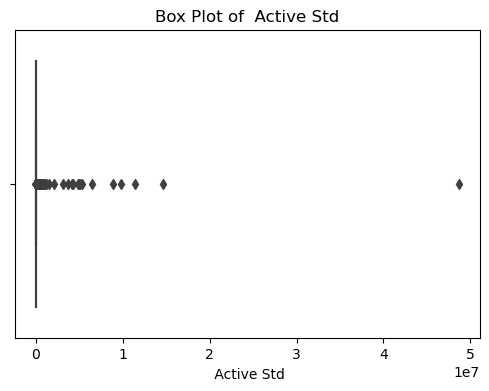

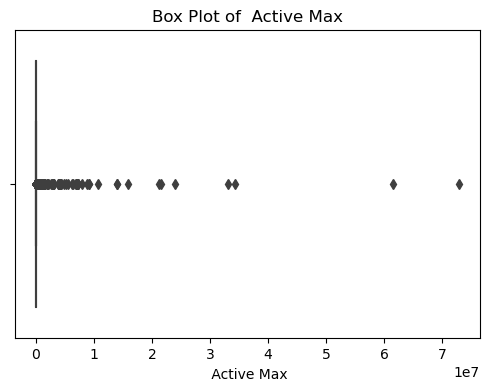

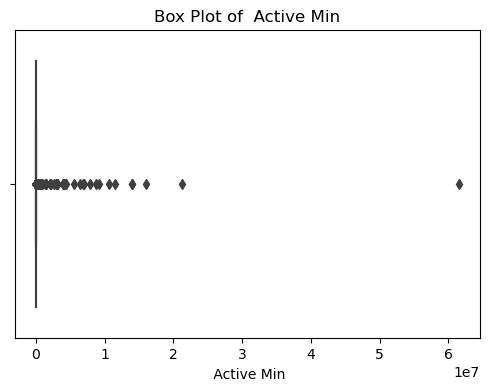

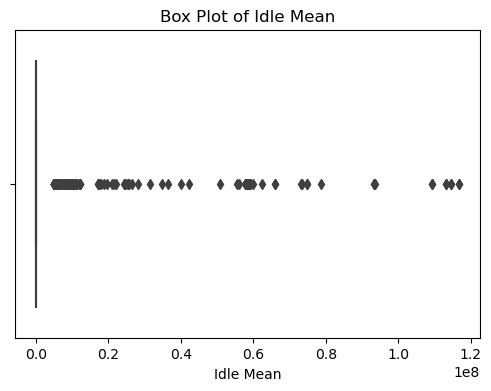

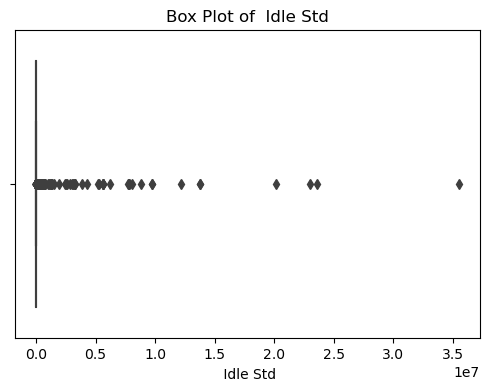

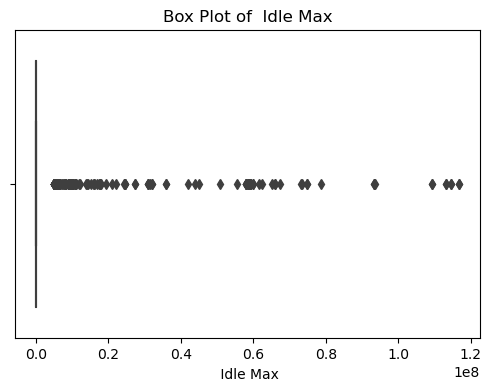

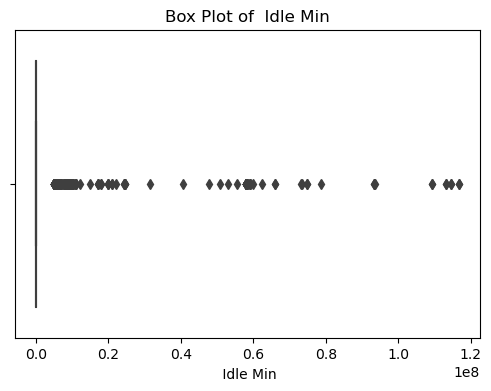

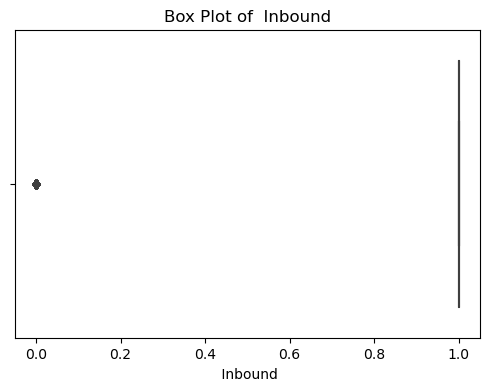

In [23]:
#Box plots for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

___Data Preprocessing___

In [19]:
#Removing the leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
#Drop the 'Flow ID' and 'Timestamp' columns
df = df.drop(['Flow ID', 'Timestamp'], axis=1)

In [ ]:
df.info()

In [ ]:
#Initializing the label encoder
label_encoder = LabelEncoder()

#Encode the 'Source IP' column
df['Source IP'] = label_encoder.fit_transform(df['Source IP'])

#Encode the 'Destination IP' column
df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

#Encode the 'Label' column (assuming 'DDoS' is 1 and 'Benign' is 0)
df['Label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
df

In [ ]:
df.info()

In [ ]:
#Correlation heatmap for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the dataset into X (features) and y (target variable)
X = df.drop('Label', axis=1)  # Drop the 'Label' column to get the features
y = df['Label']  # Select the 'Label' column as the target variable

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply the RandomUnderSampler to balance the classes
X_downsampled, y_downsampled = rus.fit_resample(X, y)

# Check the class distribution
print(y_downsampled.value_counts())

In [ ]:
y=y_downsampled
y

In [ ]:
#Check for NaN values and replace them with zeros
X = X_downsampled.replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Create a new DataFrame with the scaled values and columns from X
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

___Feature Selection___

In [ ]:
#Initialize the VarianceThreshold selector with a threshold of 0
selector = VarianceThreshold(threshold=0)

#Fit the selector to your scaled data
selector.fit(X_scaled_df)

#Get the indices of non-constant features
non_constant_indices = selector.get_support(indices=True)

#Select only the non-constant features
X_non_constant = X_scaled_df.iloc[:, non_constant_indices]

In [ ]:
X_non_constant

In [ ]:
# Select the top k features based on ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k=40)  # Adjust 'k' as needed
X_new = k_best.fit_transform(X_non_constant, y)

In [ ]:
#Create a DataFrame with the selected features
selected_feature_names = X_non_constant.columns[k_best.get_support()]
X_selected = pd.DataFrame(X_new, columns=selected_feature_names)

In [ ]:
X_selected

___Principal Component Analysis___PCA

In [ ]:
# Initialize PCA with a large number of components
pca = PCA()

# Fit PCA to your data
pca.fit(X_selected)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [ ]:
# Initialize PCA with the number of components
n_components = 10  # elbow point of the Graph is 10
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_selected)

# Create a DataFrame from the PCA-transformed data
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
X_pca_df

___Classification Model___

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

___Cross Validation on Different Classifiers___

In [ ]:
# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
    }

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_pca_df, y, cv=cv, scoring='accuracy')
    
    print(f"Classifier: {name}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Accuracy Std Dev: {scores.std():.2f}")
    print(f"Accuracy Scores: {scores}\n")

___Deep Learning___

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.2),  # Add dropout with a 20% dropout rate
    keras.layers.Dense(32, activation='relu'),
    Dropout(0.2),  # Add dropout with a 20% dropout rate
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',               # Optimizer
              loss='binary_crossentropy',    # Loss function for binary classification
              metrics=['accuracy'])          # Evaluation metric

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,            
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping])  

# Evaluate the model on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

# Plot training history (accuracy and loss over epochs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()